# Goals:


1. Intergrate all the dataset first.
2. Calculate the yearly trend of some specific name.
3. Calculate the rank of some specific name.
4. Calculate the most popular name of each year, show the names in use that have been increased or decreased the most.
5. Analyze the trend of names: vowel, diversity, length, the change of spell, first and last letter, etc.
6. Analyze the external factors of name choose: biblical names, famous people, demographic change, etc.


## data source:
[Popular baby names](https://www.ssa.gov/oact/babynames/limits.html)
The dataset we use here is the 'National Data' from Social Security Admnistration.

In [1]:
import pandas as pd 
import numpy as np

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [3]:
#we have multiple files and we want to combine all the files together into one dataframe
# pandas.concat
years = range(1880,2011) # our data up to 2010
pieces = []
columns = ['name','sex','births']
for year in years:
    path = 'Data sets/babynames/yob%d.txt' % year
    frame =pd.read_csv(path,names=columns)
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces,ignore_index=True) # concat 默认会逐行黏合，所以此处 ignore_index = True would work 
pd.options.display.max_rows = 10 
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [4]:
# we use groupby or pivot table to cluster the data by years and sex
total_births = names.pivot_table('births',index = 'year', columns ='sex',aggfunc=sum)
total_births.plot(title = 'Total births by sex and year')

In [5]:
def add_prop(group):
    group['prop'] = group.births/group.births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [6]:
names.groupby(['year','sex']).prop.sum() # check the completiness

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [7]:
def get_top1000(group):
    return group.sort_values(by='births',ascending = False)
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1689440      Gevon   M       5  2010  0.000003
         1689439     Gerron   M       5  2010  0.000003
         1689438    Georgiy   M       5  2010  0.000003
         1689437   Geoffery   M       5  2010  0.000003
         1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [8]:
top1000.reset_index(inplace=True, drop= True) # delete the group index, we don't need it 
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Gevon,M,5,2010,0.000003
1690780,Gerron,M,5,2010,0.000003
1690781,Georgiy,M,5,2010,0.000003
1690782,Geoffery,M,5,2010,0.000003


In [9]:
# a DIY way to do it
pieces = []
for year,group in names.groupby(['year','sex']):
    pieces.append(group.sort_values(by='births',ascending = False)[:1000])
top1000 = pd.concat(pieces,ignore_index = True)
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000238099653C8>,
      dtype=object)

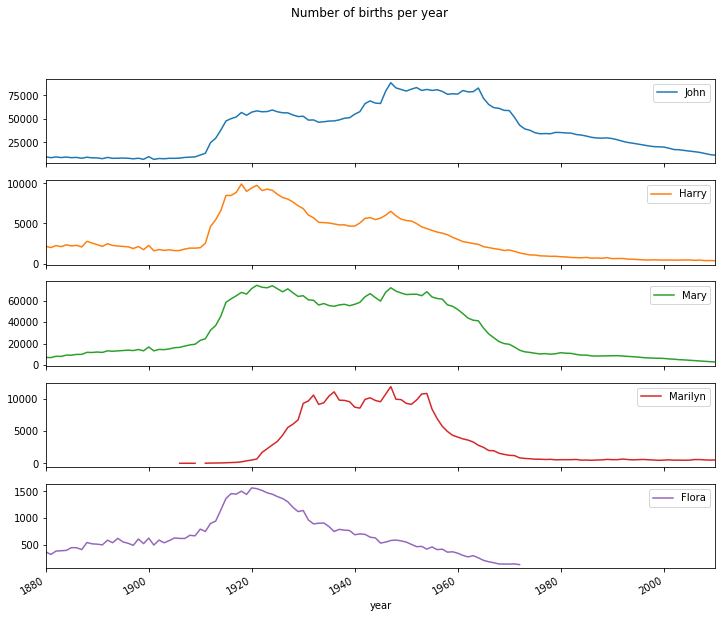

In [10]:
# analyze the trend of the names
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']
total_births = top1000.pivot_table('births',index = 'year', columns = 'name',aggfunc=sum)
total_births.info()
subset = total_births[['John','Harry','Mary','Marilyn','Flora']]
subset.plot(subplots=True,figsize=(12,10),grid=False, title = 'Number of births per year')

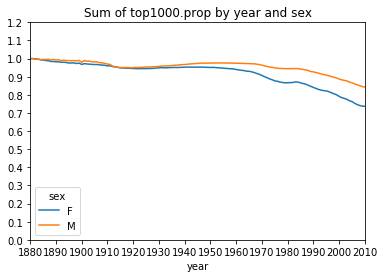

In [11]:
# 按照 year 和 sex 做 cluster and plot

table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of top1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))
# 这个 top1000 trend 在下降，意味着有越来越多其他的名字在被使用。


In [12]:
df = boys[boys.year==2010] #2010年 boys
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [13]:
# 如果我想知道有多少名字是在最受欢迎的前50%，可以使用 for loop, but numpy has a clever method
# use prop's cumsum 累计总和, and use searchsorted to get the position of the cumsum, and use a threthold 0.5 to make sure the right position

prop_cumsum = df.sort_values(by='prop',ascending= False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5) +1 #0 indexed, so the right position should be 117


117

In [14]:
df = boys[boys.year==1900]
in1900 = df.sort_values(by='prop',ascending = False).prop.cumsum()
in1900.values.searchsorted(0.5)

24

In [15]:
# can apply this method to all the years/sex, so we make a function
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending= False).prop.cumsum()
    return group.values.searchsorted(q)+1

diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


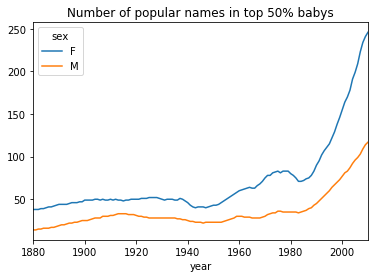

In [16]:
diversity.plot(title='Number of popular names in top 50% babys')
# girls' name has more diversity than boys

In [17]:
# the last character
get_last_char=lambda x:x[-1]
last_letters = names.name.map(get_last_char)
last_letters.name='last_letter'
table = names.pivot_table('births',index=last_letters, columns = ['sex','year'],aggfunc = sum)
subtable = table.reindex(columns=[1910,1960,2010],level ='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [18]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [19]:
letter_prop = subtable/subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

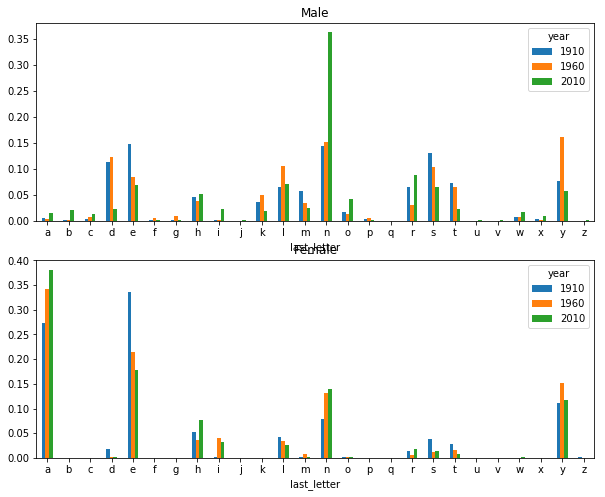

In [20]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female')


In [22]:
letter_prop = table/table.sum()
dny_ts = letter_prop.loc[['d','n','y'],'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


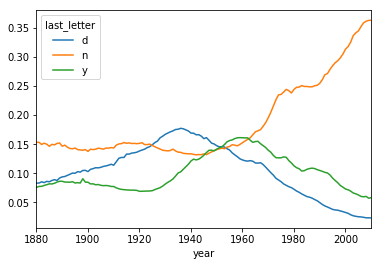

In [23]:
dny_ts.plot() #随时间变化趋势

In [24]:
#男孩的名字变成了女孩的名字 and vice versa
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [25]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [27]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc='sum')
table = table.div(table.sum(1),axis=0)
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2006,1.000000,NaN
2007,1.000000,NaN
2008,1.000000,NaN


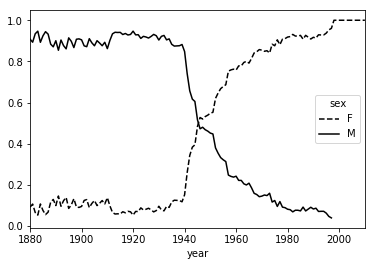

In [28]:
#按性别随时间推移的分解图
table.plot(style={'M':'k-','F':'k--'})